IMPORTAZIONE LIBRERIE

In [254]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [255]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [256]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


C:\Users\mgale\AppData\Local\Temp\ipykernel_24408\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\mgale\AppData\Local\Temp\ipykernel_24408\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\mgale\AppData\Local\Temp\ipykernel_24408\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\mgale\AppData\Local\Temp\ipykernel_24408\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\mgale\AppData\L

In [257]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.025278   0.017191   -0.117391   0.133346         79.0   
1       1.0 -0.025284   0.017142   -0.109234   0.133164        107.0   
2       2.0 -0.025410   0.017099   -0.104507   0.133027        110.0   
3       3.0 -0.026125   0.017232   -0.127146   0.133661         78.0   
4       4.0 -0.026810   0.017350   -0.150134   0.134237         81.0   
...     ...       ...        ...         ...        ...          ...   
1327   61.0 -0.033834   0.004468   -0.091229   0.074844          0.0   
1328   62.0 -0.033994   0.004467   -0.098090   0.074915          0.0   
1329   63.0 -0.034181   0.004471   -0.108344   0.075024          0.0   
1330   64.0 -0.034515   0.004507   -0.121542   0.075413          0.0   
1331   65.0 -0.034765   0.004522   -0.137664   0.075629          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            76.0    3.609819    3.564965 -0.021368  ... 

In [258]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.025278   0.017191   -0.117391   0.133346         79.0         76.0   
1    -0.025284   0.017142   -0.109234   0.133164        107.0         87.0   
2    -0.025410   0.017099   -0.104507   0.133027        110.0         92.0   
3    -0.026125   0.017232   -0.127146   0.133661         78.0         75.0   
4    -0.026810   0.017350   -0.150134   0.134237         81.0         82.0   
...        ...        ...         ...        ...          ...          ...   
1327 -0.033834   0.004468   -0.091229   0.074844          0.0         77.0   
1328 -0.033994   0.004467   -0.098090   0.074915          0.0         82.0   
1329 -0.034181   0.004471   -0.108344   0.075024          0.0        108.0   
1330 -0.034515   0.004507   -0.121542   0.075413          0.0         85.0   
1331 -0.034765   0.004522   -0.137664   0.075629          0.0         77.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [259]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

In [260]:
guasto_10 = df_1[df_1['Guasto'] == 2]
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  387 Guasto 5%:  412 Guasto 10%:  533


### Bilanciamento del dataset

In [261]:
#bilanciamento del dataset con undersampling rispetto al no_guasto
balanced_d = pd.concat([no_guasto, guasto_10.sample(len(no_guasto)), guasto_5.sample(len(no_guasto))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(1161, 169)

In [262]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel_mutual = SelectKBest(mutual_info_classif, k=6)
X_train_mutual = sel_mutual.fit_transform(x, y)
print(sel_mutual.get_support())

i=0
index_false=[]
for el in list(sel_mutual.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

d:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [263]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

     var(GyrX)  RMS(AccY)  <>(Pitch)  var(Curr(ESC_1))  var(RPM(ESC_2))  \
189   0.020502   0.383337  -0.217208          0.320503     1.026966e+06   
190   0.020532   0.385013  -0.214574          0.319868     1.025722e+06   
191   0.020512   0.386771  -0.211955          0.319235     1.024477e+06   
192   0.020498   0.387917  -0.209350          0.318603     1.023229e+06   
193   0.020535   0.388852  -0.206761          0.317974     1.021978e+06   
..         ...        ...        ...               ...              ...   
146   0.009607   0.299271   0.348970          0.541487     8.401734e+05   
572   0.007802   0.362159   0.079781          2.064080     2.112293e+06   
806   0.038601   0.468906   0.570168          0.304957     1.630363e+06   
815   0.039661   0.474304   0.604891          0.318166     1.616550e+06   
141   0.009578   0.297737   0.355165          0.541457     8.477789e+05   

     var(RPM(ESC_5))  
189     9.380167e+05  
190     9.380474e+05  
191     9.380627e+05  
192    

In [264]:
#x = df_1.iloc[:,:-1]
#y = df_1.iloc[:,-1:]

### Separazione del dataset in training e test

In [265]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(928, 6)
(233, 6)
(928, 1)
(233, 1)


In [266]:
#from sklearn.feature_selection import SelectKBest, mutual_info_classif
#sel_mutual = SelectKBest(mutual_info_classif, k=6)
#X_train_mutual = sel_mutual.fit_transform(x_train, y_train)
#print(sel_mutual.get_support())

#i=0
#index_false=[]
#for el in list(sel_mutual.get_support()):
#    if not el:
#        index_false.append(i)
#    i=i+1
#print(index_false)

In [267]:
#x_train=x_train.drop(x_train.columns[index_false],axis = 1)
#x_test=x_test.drop(x_test.columns[index_false],axis = 1)

In [268]:
x_train

,var(GyrX),RMS(AccY),<>(Pitch),var(Curr(ESC_1)),var(RPM(ESC_2)),var(RPM(ESC_5))
1190,0.017503,0.426507,-0.061915,0.531409,5.476025e+05,4.409469e+05
374,0.006422,0.288712,0.411273,0.515925,7.890491e+05,1.181918e+06
376,0.006557,0.289045,0.417778,0.516267,7.886295e+05,1.180031e+06
972,0.026943,0.553790,-0.217328,0.292667,7.954607e+05,7.549520e+05
986,0.026311,0.557890,-0.237583,0.335306,7.936194e+05,7.541520e+05
...,...,...,...,...,...,...
615,0.007466,0.358713,0.094681,2.077117,1.936923e+06,2.292598e+06
645,0.007222,0.358984,0.083037,2.040925,1.824438e+06,2.164587e+06
809,0.038933,0.469541,0.581389,0.309551,1.625831e+06,9.356531e+05
125,0.009630,0.296612,0.374377,0.539678,8.722360e+05,9.973591e+05


In [269]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    #DecisionTreeClassifier(random_state=rs),
    #RandomForestClassifier(n_estimators = 10, random_state=rs),
    #GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [270]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.61 	 ---> LogisticRegression 
Accuracy: 0.89 	 ---> AdaBoostClassifier 
Accuracy: 0.93 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.85 	 ---> SVC 


### Matrici di confusione

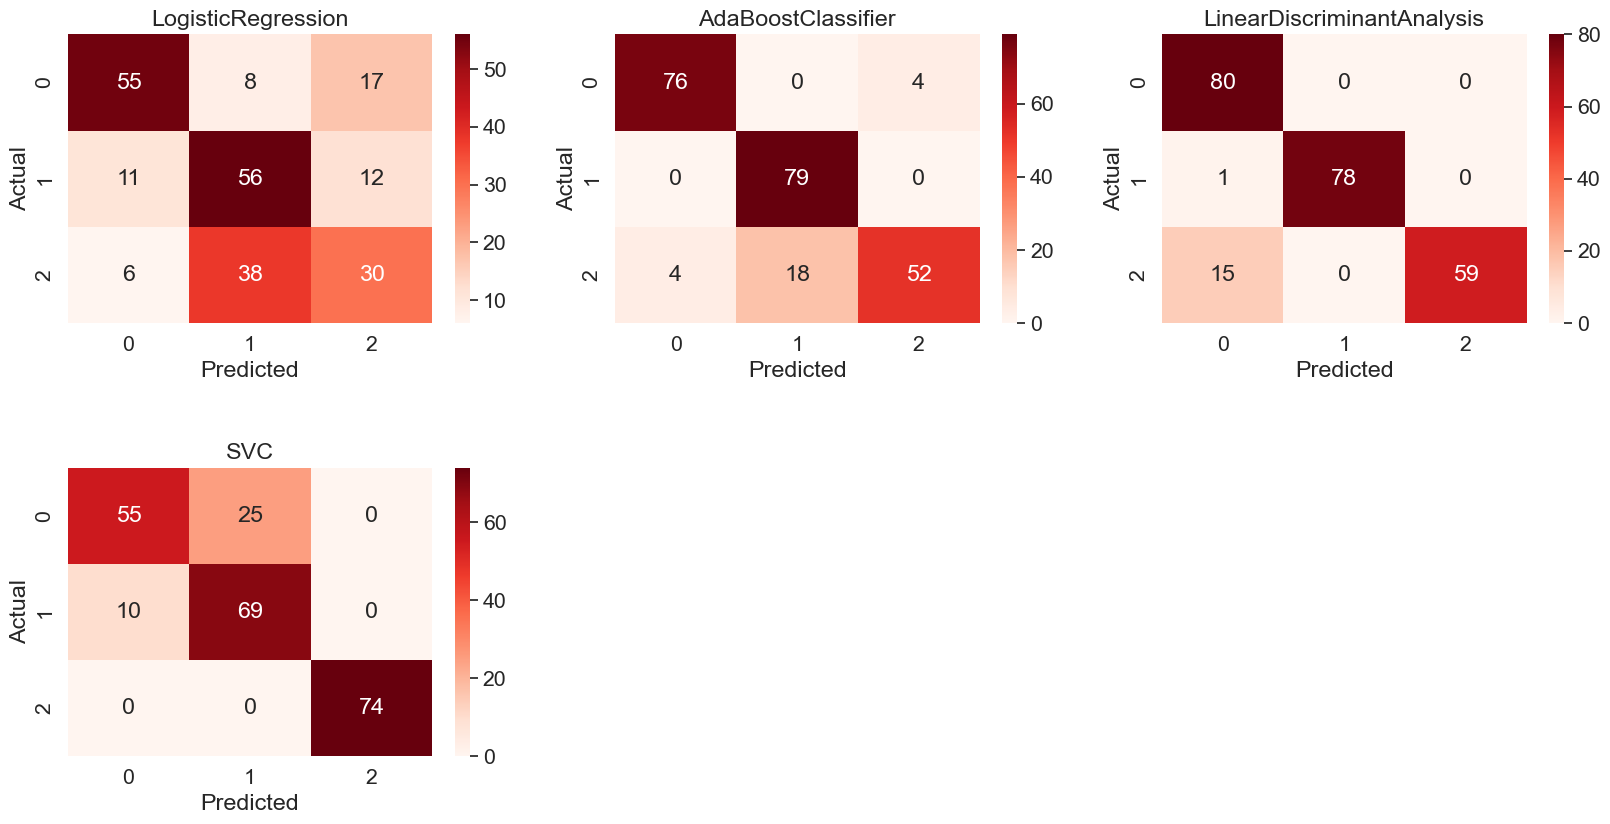

In [271]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [272]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        80
           1       0.55      0.71      0.62        79
           2       0.51      0.41      0.45        74

    accuracy                           0.61       233
   macro avg       0.61      0.60      0.60       233
weighted avg       0.61      0.61      0.60       233

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.81      1.00      0.90        79
           2       0.93      0.70      0.80        74

    accuracy                           0.89       233
   macro avg       0.90      0.88      0.88       233
weighted avg       0.90      0.89      0.88       233

LinearDiscriminantAnalysis Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      

In [273]:
# Search grid for optimal parameters. Si vanno a testare tutte le possibili combinazioni di iperparametri

#DecisionTree Iperparametri
DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

#GradientBoosting Iperparametri
GB_param = {'loss' : ["deviance"],
            'n_estimators' : [100,200,300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [100,150],
            'max_features': [0.3, 0.1]}

#SVC_param = {'C':[1,10,100,1000],
#             'gamma':[1,0.1,0.001,0.0001], 
#             'kernel':['linear','rbf']}

#RF_param = {"max_depth": [None],
#            "max_features": [0.3, 0.7, 1],
#            "min_samples_split": [2, 3, 10],
#            "min_samples_leaf": [1, 3, 10],
#            "bootstrap": [False],
#            "n_estimators" :[100,300],
#            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
GBgs = GridSearchCV(GradientBoostingClassifier(), param_grid=GB_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, GBgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train.values.ravel())
    gs_model.append(model.best_estimator_) #si salva il miglior modello
    score.append(model.best_score_) #si salva lo score

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


d:\Program Files\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Index(['Guasto', 'LogisticRegression', 'AdaBoostClassifier',
       'LinearDiscriminantAnalysis', 'SVC'],
      dtype='object')


Text(0.5, 1.0, 'Correlation between models')

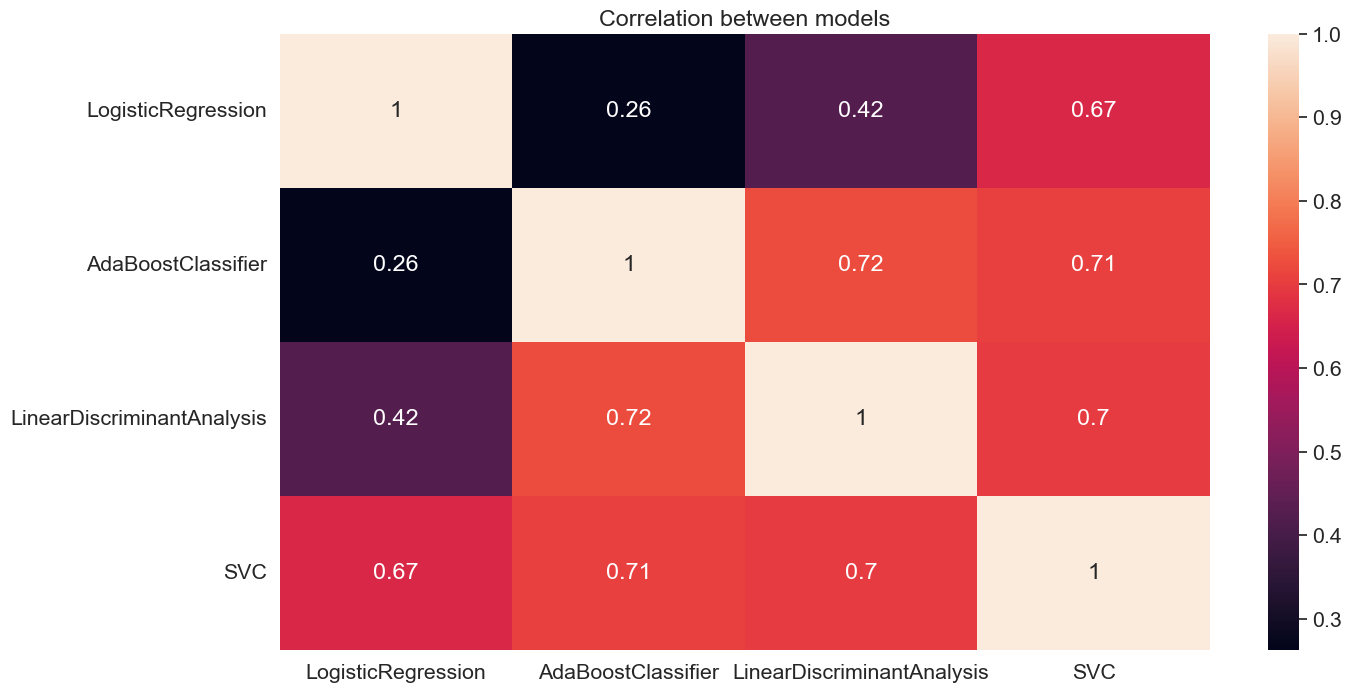

In [274]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
print(model_results.columns)
sns.heatmap(model_results.drop("Guasto", axis=1).corr(),annot=True)
plt.title("Correlation between models")

MODEL ENSEMBLE

In [275]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train.values.ravel())
print(accuracy_score(y_test,best_model.predict(x_test)))

0.9957081545064378


TESTING DEL MODELLO

In [276]:
#livello_pred = pd.Series(best_model.predict(allMadrid_test), name='Livello_test')
#livello_pred.value_counts()